In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import os
import sys

import matplotlib.pyplot as plt
import seaborn as sns

project_root = os.path.abspath(os.path.join(os.pardir))

module_path = os.path.join(project_root, 'src')
if module_path not in sys.path:
    sys.path.append(module_path)

data_path = os.path.join(project_root, 'data', 'train.csv')
df_train = pd.read_csv(data_path)

## 📊 EDA (Exploratory Data Analysis)

#### Step 1 - Check the statistics

In [2]:
df_train.head(2)

,id,date,country,store,product,num_sold
0,0,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63
1,1,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,66


In [3]:
df_train['date'] = pd.to_datetime(df_train['date'])
df_train.shape

(136950, 6)

In [4]:
print(min(df_train['date']))
print(max(df_train['date']))

2017-01-01 00:00:00
2021-12-31 00:00:00


In [5]:
countries = df_train['country'].unique()
stores = df_train['store'].unique()
products = df_train['product'].unique()

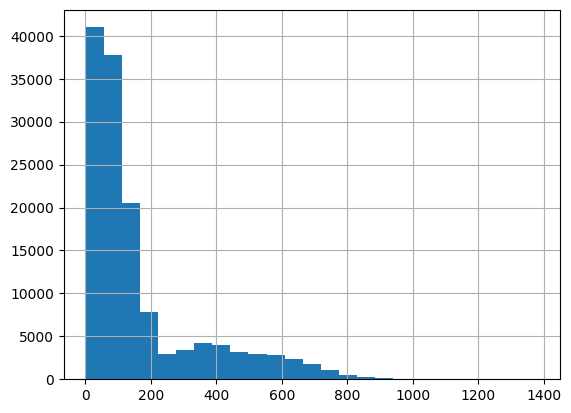

In [6]:
df_train.num_sold.hist(bins=25)
plt.show()

In [7]:
df_train['country'].value_counts().reset_index()

,country,count
0,Argentina,27390
1,Canada,27390
2,Estonia,27390
3,Japan,27390
4,Spain,27390


In [8]:
df_train['store'].value_counts().reset_index()

,store,count
0,Kaggle Learn,45650
1,Kaggle Store,45650
2,Kagglazon,45650


In [9]:
df_train['product'].value_counts().reset_index()

,product,count
0,Using LLMs to Improve Your Coding,27390
1,Using LLMs to Train More LLMs,27390
2,Using LLMs to Win Friends and Influence People,27390
3,Using LLMs to Win More Kaggle Competitions,27390
4,Using LLMs to Write Better,27390


In [10]:
df_train.dtypes.reset_index()

,index,0
0,id,int64
1,date,datetime64[ns]
2,country,object
3,store,object
4,product,object
5,num_sold,int64


In [11]:
df_train.isna().mean().reset_index()

,index,0
0,id,0.0
1,date,0.0
2,country,0.0
3,store,0.0
4,product,0.0
5,num_sold,0.0


### Data Summary

**Missing Values**:  
All columns are complete with no missing data (0% missing). Every column has data for all rows.

**Country**:  
The dataset includes data from five different countries.

**Store**:  
Sales data comes from three unique Kaggle-branded stores.

**Product**:  
There are five distinct products available for sale.

#### Step 2 - Visualization

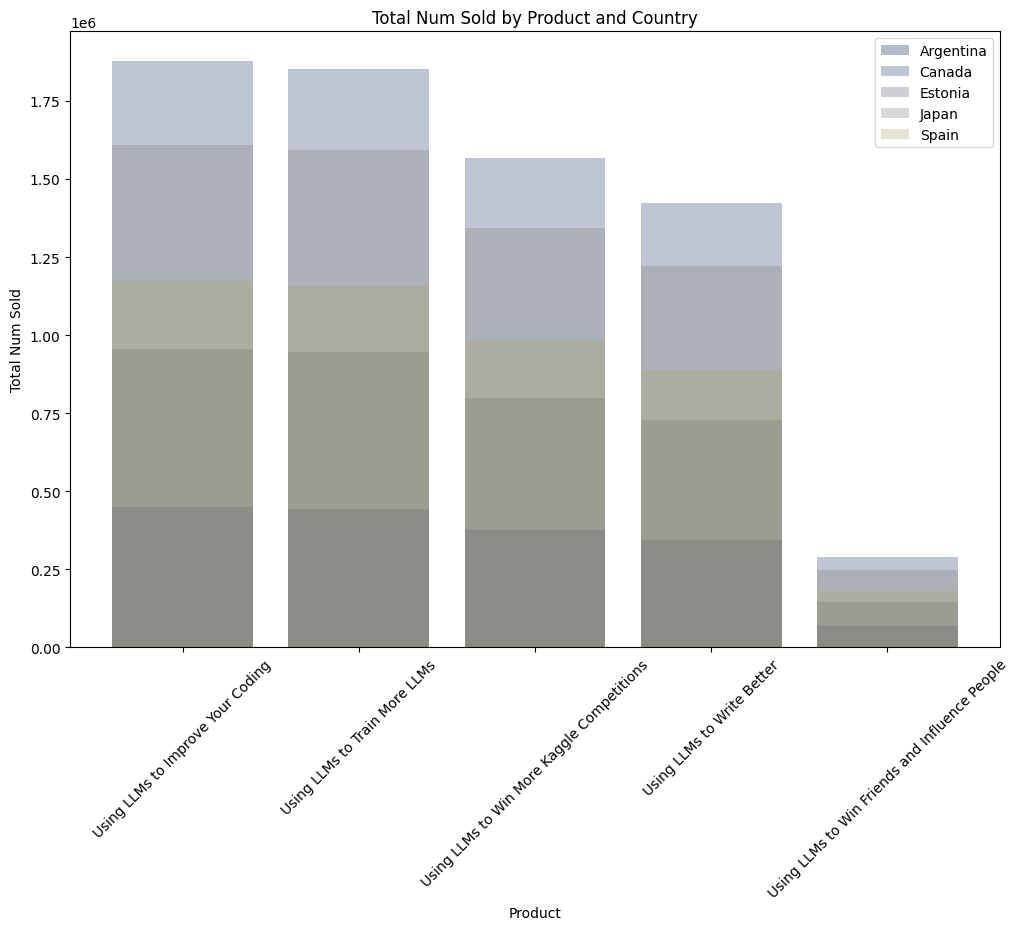

In [12]:
agg_num_sold = df_train.groupby(['country', 'product']).num_sold.sum().reset_index()
agg_num_sold = agg_num_sold.sort_values(['num_sold', 'product'], ascending=False)

colors = plt.cm.cividis(np.linspace(0, .7, len(countries)))
plt.figure(figsize=(12, 8))

for i, country in enumerate(countries):
    subset = agg_num_sold[agg_num_sold['country'] == country]
    plt.bar(subset['product'], 
            subset['num_sold'], 
            alpha=0.3, 
            color=colors[i], 
            label=country)

plt.title('Total Num Sold by Product and Country')
plt.xlabel('Product')
plt.ylabel('Total Num Sold')
plt.xticks(rotation=45)
plt.legend()

plt.show()

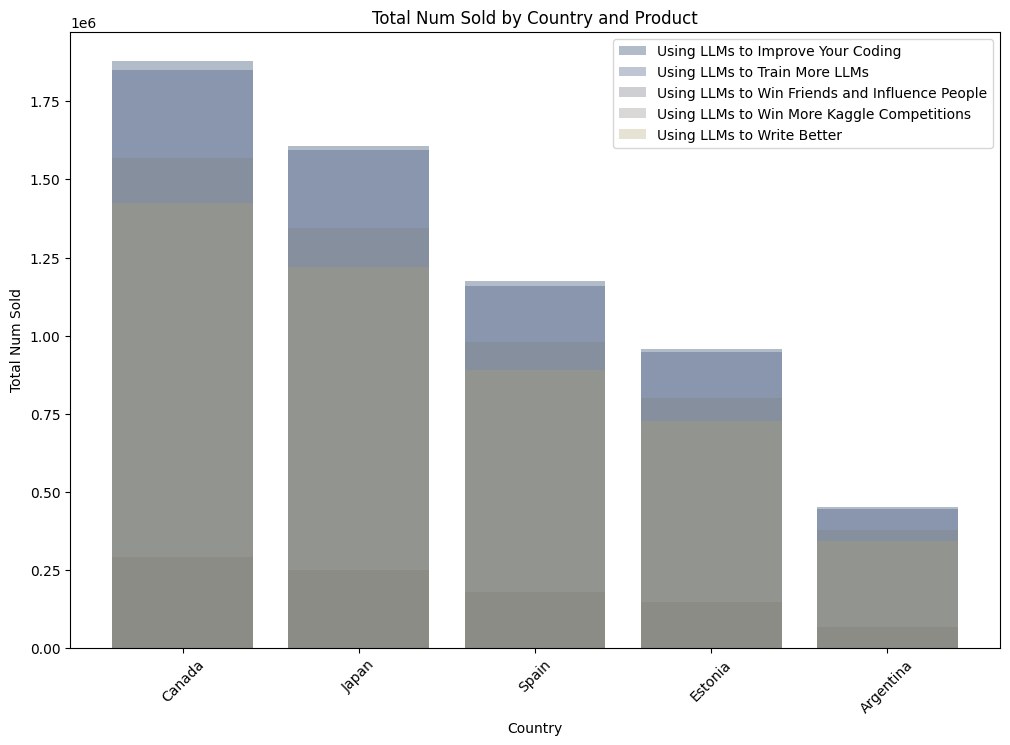

In [13]:
agg_num_sold = df_train.groupby(['country', 'product']).num_sold.sum().reset_index()
agg_num_sold = agg_num_sold.sort_values(['num_sold', 'product'], ascending=False)

colors = plt.cm.cividis(np.linspace(0, .7, len(products)))
plt.figure(figsize=(12, 8))

for i, product in enumerate(products):
    subset = agg_num_sold[agg_num_sold['product'] == product]
    plt.bar(subset['country'], 
            subset['num_sold'], 
            alpha=0.3, 
            color=colors[i], 
            label=product)

plt.title('Total Num Sold by Country and Product')
plt.xlabel('Country')
plt.ylabel('Total Num Sold')
plt.xticks(rotation=45)
plt.legend()

plt.show()

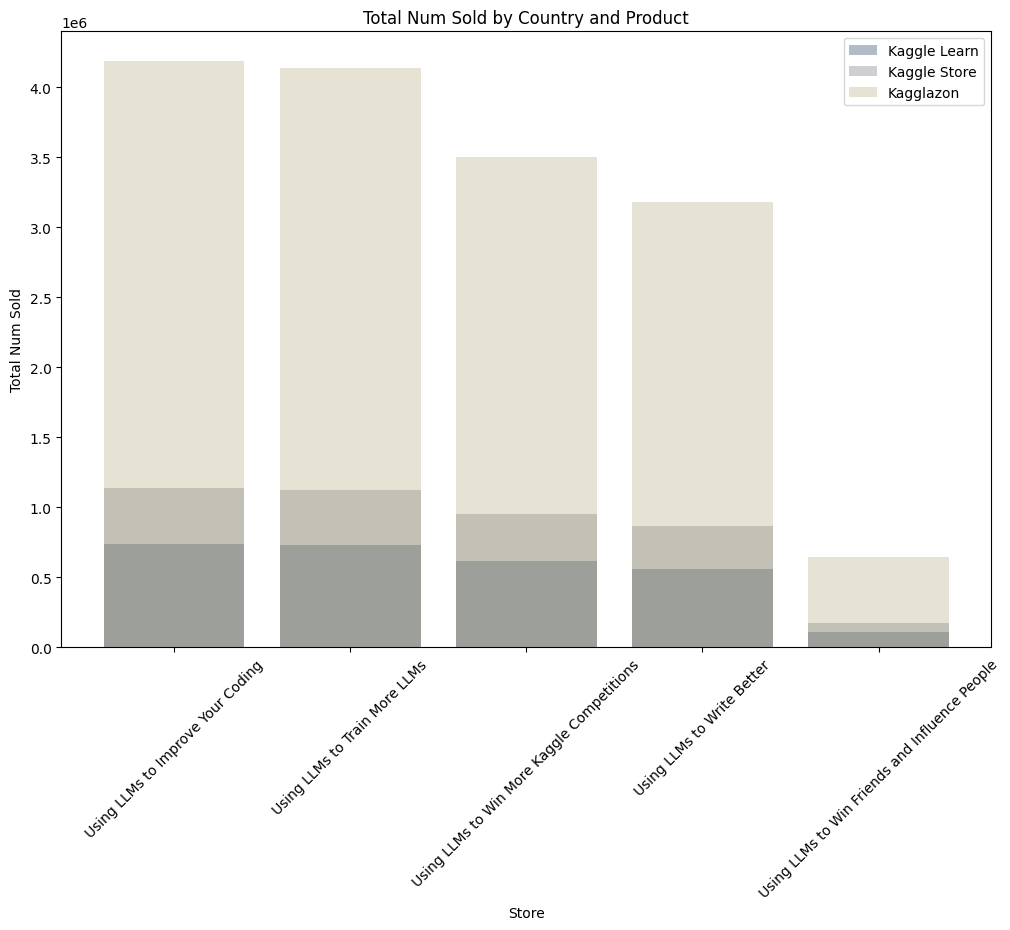

In [14]:
agg_num_sold = df_train.groupby(['store', 'product']).num_sold.sum().reset_index()
agg_num_sold = agg_num_sold.sort_values(['num_sold', 'product'], ascending=False)

colors = plt.cm.cividis(np.linspace(0, .7, len(stores)))
plt.figure(figsize=(12, 8))

for i, store in enumerate(stores):
    subset = agg_num_sold[agg_num_sold['store'] == store]
    plt.bar(subset['product'], 
            subset['num_sold'], 
            alpha=0.3,
            color=colors[i], 
            label=store)

plt.title('Total Num Sold by Country and Product')
plt.xlabel('Store')
plt.ylabel('Total Num Sold')
plt.xticks(rotation=45)
plt.legend()

plt.show()

**Histogram Insights**:

> **Key Observation:**  
> An in-depth analysis of the histogram displaying total sales by product reveals a striking consistency in sales patterns across various countries.  
> 
> The distribution of sales for each product remains remarkably similar regardless of the country, suggesting a uniformity in product preference and performance on a global scale.  
> 
> This indicates that consumer behavior and product success are not significantly influenced by geographic location.

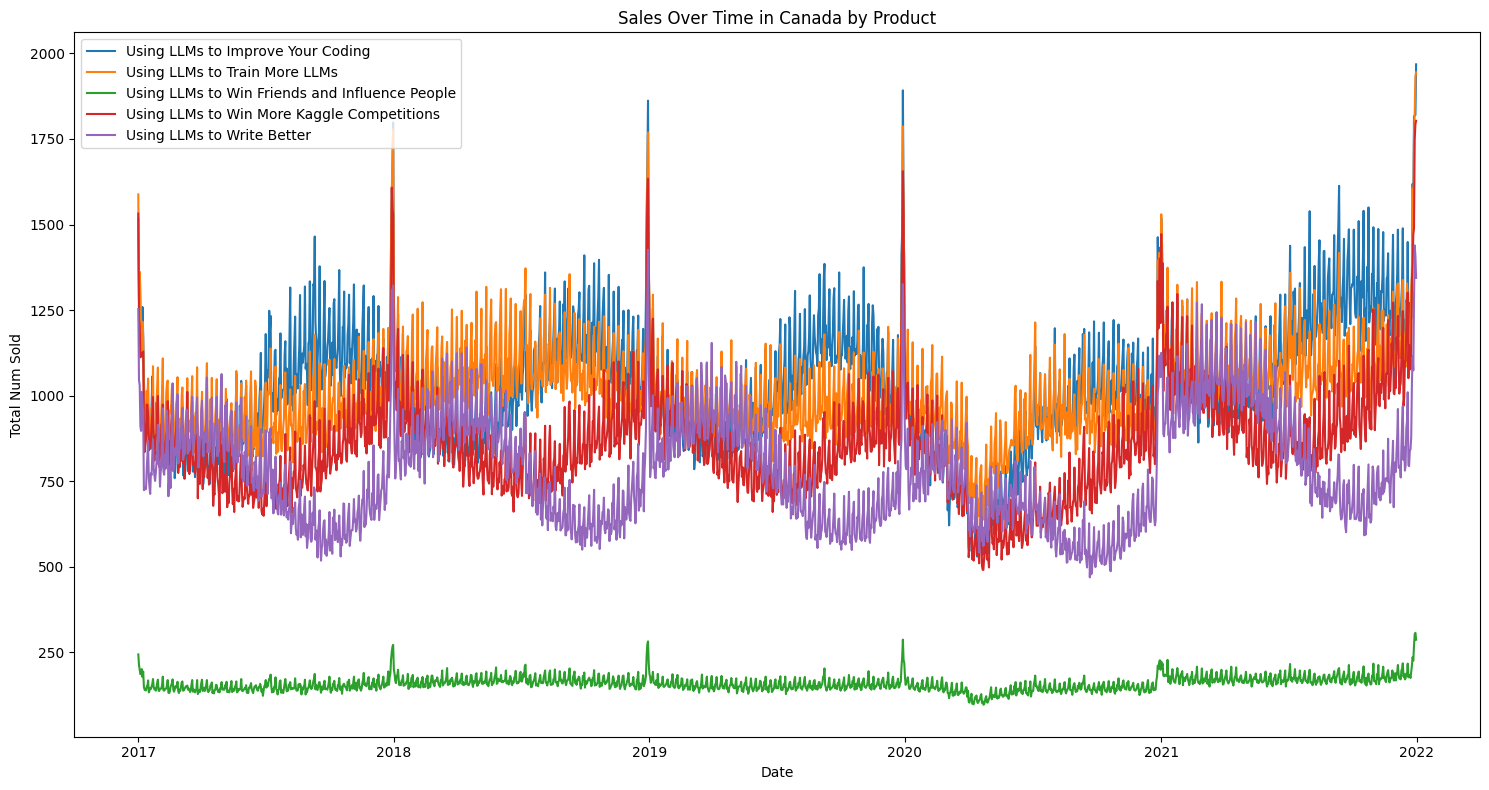

In [15]:
# Create a new DataFrame that aggregates num_sold by date, product, and country
agg_num_sold_time = df_train.groupby(['date', 'product', 'country'], as_index=False)['num_sold'].sum()

country = 'Canada' # 'Argentina' 'Canada' 'Estonia' 'Japan' 'Spain'
country_df = agg_num_sold_time[agg_num_sold_time['country'] == country]

# Plot the data for this country
plt.figure(figsize=(15, 8))

for product in country_df['product'].unique():
    product_df = country_df[country_df['product'] == product]
    plt.plot(product_df['date'], product_df['num_sold'], label=product)

plt.title(f'Sales Over Time in {country} by Product')
plt.xlabel('Date')
plt.ylabel('Total Num Sold')
plt.legend()

plt.tight_layout()
plt.show()

**Time Series Line Graph Insights**

> **Key Observations:**  
> Looking at the time series line graphs shows two important patterns:
> 
> 1. **Sales Spikes Across All Countries:**  
> There are clear spikes in sales data in all countries. These spikes suggest there might be seasonal patterns in sales, which need more study to understand why they happen.
> 
> 2. **Country-Specific Cyclicality:**  
> While all countries have cycles in sales, the pattern of these cycles is different for each country. For example, Japan has sales spikes at different times compared to other countries, showing unique market behavior.

### Generate features

In [27]:
data_path = os.path.join(project_root, 'data', 'train.csv')
df_train = pd.read_csv(data_path)

df_train['date'] = pd.to_datetime(df_train['date'])
df_train = df_train.sort_values('date')
df_train.head(2)

,id,date,country,store,product,num_sold
0,0,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63
54,54,2017-01-01,Japan,Kaggle Store,Using LLMs to Write Better,191


In [28]:
df_train['year'] = df_train['date'].dt.year
df_train['month'] = df_train['date'].dt.month
df_train['day'] = df_train['date'].dt.day
df_train['dayofweek'] = df_train['date'].dt.dayofweek
df_train['quarter'] = df_train['date'].dt.quarter
df_train['is_weekend'] = (df_train['date'].dt.dayofweek >= 5).astype(np.int64)
df_train.head(2)

,id,date,country,store,product,num_sold,year,month,day,dayofweek,quarter,is_weekend
0,0,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63,2017,1,1,6,1,1
54,54,2017-01-01,Japan,Kaggle Store,Using LLMs to Write Better,191,2017,1,1,6,1,1


In [29]:
# Creating lag features within each group
def create_lag_features(group):
    for lag in range(1, 8):  # Creating 7 lag features
        group[f'lag_{lag}'] = group['num_sold'].shift(lag)
    return group

# Apply lag feature creation within each 'country', 'store', 'product' group
df_train = df_train.groupby(['country', 'store', 'product']).apply(create_lag_features)
# # df_train = df_train.reset_index(drop=True)

df_train.head(3)

id       date  \
country   store     product                                                 
Argentina Kagglazon Using LLMs to Improve Your Coding 10    10 2017-01-01   
                                                      85    85 2017-01-02   
                                                      160  160 2017-01-03   

                                                             country  \
country   store     product                                            
Argentina Kagglazon Using LLMs to Improve Your Coding 10   Argentina   
                                                      85   Argentina   
                                                      160  Argentina   

                                                               store  \
country   store     product                                            
Argentina Kagglazon Using LLMs to Improve Your Coding 10   Kagglazon   
                                                      85   Kagglazon   
                                                      160  Kagglazon   

                                                                                     product  \
country   store     product                                                                    
Argentina Kagglazon Using LLMs to Improve Your Coding 10   Using LLMs to Improve Your Coding   
                                                      85   Using LLMs to Improve Your Coding   
                                                      160  Using LLMs to Improve Your Coding   

                                                           num_sold  year  \
country   store     product                                                 
Argentina Kagglazon Using LLMs to Improve Your Coding 10        340  2017   
                                                      85        250  2017   
                                                      160       267  2017   

                                                           month  day  \
country   store     product                                             
Argentina Kagglazon Using LLMs to Improve Your Coding 10       1    1   
                                                      85       1    2   
                                                      160      1    3   

                                                           dayofweek  quarter  \
country   store     product                                                     
Argentina Kagglazon Using LLMs to Improve Your Coding 10           6        1   
                                                      85           0        1   
                                                      160          1        1   

                                                           is_weekend  lag_1  \
country   store     product                                                    
Argentina Kagglazon Using LLMs to Improve Your Coding 10            1    NaN   
                                                      85            0  340.0   
                                                      160           0  250.0   

                                                           lag_2  lag_3  \
country   store     product                                               
Argentina Kagglazon Using LLMs to Improve Your Coding 10     NaN    NaN   
                                                      85     NaN    NaN   
                                                      160  340.0    NaN   

                                                           lag_4  lag_5  \
country   store     product                                               
Argentina Kagglazon Using LLMs to Improve Your Coding 10     NaN    NaN   
                                                      85     NaN    NaN   
                                                      160    NaN    NaN   

                                                           lag_6  lag_7  
country   store     product                                              
Argentina Ka

In [30]:
# Fill NA values caused by lag features
df_train = df_train.bfill().ffill()
df_train.head(3)

id       date  \
country   store     product                                                 
Argentina Kagglazon Using LLMs to Improve Your Coding 10    10 2017-01-01   
                                                      85    85 2017-01-02   
                                                      160  160 2017-01-03   

                                                             country  \
country   store     product                                            
Argentina Kagglazon Using LLMs to Improve Your Coding 10   Argentina   
                                                      85   Argentina   
                                                      160  Argentina   

                                                               store  \
country   store     product                                            
Argentina Kagglazon Using LLMs to Improve Your Coding 10   Kagglazon   
                                                      85   Kagglazon   
                                                      160  Kagglazon   

                                                                                     product  \
country   store     product                                                                    
Argentina Kagglazon Using LLMs to Improve Your Coding 10   Using LLMs to Improve Your Coding   
                                                      85   Using LLMs to Improve Your Coding   
                                                      160  Using LLMs to Improve Your Coding   

                                                           num_sold  year  \
country   store     product                                                 
Argentina Kagglazon Using LLMs to Improve Your Coding 10        340  2017   
                                                      85        250  2017   
                                                      160       267  2017   

                                                           month  day  \
country   store     product                                             
Argentina Kagglazon Using LLMs to Improve Your Coding 10       1    1   
                                                      85       1    2   
                                                      160      1    3   

                                                           dayofweek  quarter  \
country   store     product                                                     
Argentina Kagglazon Using LLMs to Improve Your Coding 10           6        1   
                                                      85           0        1   
                                                      160          1        1   

                                                           is_weekend  lag_1  \
country   store     product                                                    
Argentina Kagglazon Using LLMs to Improve Your Coding 10            1  340.0   
                                                      85            0  340.0   
                                                      160           0  250.0   

                                                           lag_2  lag_3  \
country   store     product                                               
Argentina Kagglazon Using LLMs to Improve Your Coding 10   340.0  340.0   
                                                      85   340.0  340.0   
                                                      160  340.0  340.0   

                                                           lag_4  lag_5  \
country   store     product                                               
Argentina Kagglazon Using LLMs to Improve Your Coding 10   340.0  340.0   
                                                      85   340.0  340.0   
                                                      160  340.0  340.0   

                                                           lag_6  lag_7  
country   store     product                                              
Argentina Ka

In [31]:
# One-hot encoding with dtype=np.int64 to ensure 0/1 instead of True/False
df_train = pd.get_dummies(df_train, columns=['country', 'store', 'product'], drop_first=True, dtype=np.int64)
df_train.head(3)

id       date  \
country   store     product                                                 
Argentina Kagglazon Using LLMs to Improve Your Coding 10    10 2017-01-01   
                                                      85    85 2017-01-02   
                                                      160  160 2017-01-03   

                                                           num_sold  year  \
country   store     product                                                 
Argentina Kagglazon Using LLMs to Improve Your Coding 10        340  2017   
                                                      85        250  2017   
                                                      160       267  2017   

                                                           month  day  \
country   store     product                                             
Argentina Kagglazon Using LLMs to Improve Your Coding 10       1    1   
                                                      85       1    2   
                                                      160      1    3   

                                                           dayofweek  quarter  \
country   store     product                                                     
Argentina Kagglazon Using LLMs to Improve Your Coding 10           6        1   
                                                      85           0        1   
                                                      160          1        1   

                                                           is_weekend  lag_1  \
country   store     product                                                    
Argentina Kagglazon Using LLMs to Improve Your Coding 10            1  340.0   
                                                      85            0  340.0   
                                                      160           0  250.0   

                                                           ...  \
country   store     product                                ...   
Argentina Kagglazon Using LLMs to Improve Your Coding 10   ...   
                                                      85   ...   
                                                      160  ...   

                                                           country_Canada  \
country   store     product                                                 
Argentina Kagglazon Using LLMs to Improve Your Coding 10                0   
                                                      85                0   
                                                      160               0   

                                                           country_Estonia  \
country   store     product                                                  
Argentina Kagglazon Using LLMs to Improve Your Coding 10                 0   
                                                      85                 0   
                                                      160                0   

                                                           country_Japan  \
country   store     product                                                
Argentina Kagglazon Using LLMs to Improve Your Coding 10               0   
                                                      85               0   
                                                      160              0   

                                                           country_Spain  \
country   store     product                                                
Argentina Kagglazon Using LLMs to Improve Your Coding 10               0   
                                                      85               0   
                                                      160              0   

                                                           store_Kaggle Learn  \
country   store     product                                                     
Argentina Kagglazon Using LLMs to Improve Your Coding 10                    0   
  

### Split data

In [61]:
unique_dates = df_train['date'].sort_values().unique()

In [62]:
# Determine the date threshold for validation set
validation_start_date = unique_dates[-84]

In [63]:
validation_start_date

Timestamp('2021-10-09 00:00:00')

In [64]:
# Split the data into train and validation sets based on date threshold
train_mask = df_train['date'] < validation_start_date
val_mask = df_train['date'] >= validation_start_date

X_train = df_train[train_mask].drop(['id', 'num_sold'], axis=1)
X_val = df_train[val_mask].drop(['id', 'num_sold'], axis=1)
y_train = df_train.loc[train_mask, 'num_sold']
y_val = df_train.loc[val_mask, 'num_sold']

In [ ]:
unique_combinations = X_val.index.droplevel(-1).unique()
print(len(unique_combinations))

for combination in unique_combinations:
    print(df_train.xs(combination, level=['country', 'store', 'product']).shape)

### time_series_cv

In [25]:
# indices = []
# dates = np.sort(X_train[date_col].unique())
# n_samples = len(dates)
# for i in range(1, cv + 1):
#     print(i)
#     train_end_date = dates[n_samples - cv - 1]
#     val_date = dates[n_samples - cv : n_samples - cv + i]
#     print(train_end_date)
#     print(val_date)
#     print()
#     train_indices = X_train[X_train['date'] <= train_end_date].index
#     val_indices = X_train[X_train['date'].isin(val_date)].index
    
#     if len(train_indices) > 0 and len(val_indices) > 0:
#         indices.append((train_indices, val_indices))

In [ ]:
indices = []
dates = np.sort(X_train[date_col].unique())
n_samples = len(dates)
for i in range(1, cv + 1):
    train_end_date = dates[n_samples - cv - 1]
    val_date = dates[n_samples - cv : n_samples - cv + i]
    train_indices = X_train[X_train['date'] <= train_end_date].index
    val_indices = X_train[X_train['date'].isin(val_date)].index

    if len(train_indices) > 0 and len(val_indices) > 0:
        indices.append((train_indices, val_indices))

In [69]:
df_forecast = df_train[val_mask].copy()
df_forecast['forecast'] = np.nan

In [77]:
# Train the model on the training set
from lightgbm import LGBMRegressor
model = LGBMRegressor(random_state=42)
model.fit(X_train.drop('date', axis=1), y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002785 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1870
[LightGBM] [Info] Number of data points in the train set: 130650, number of used features: 23
[LightGBM] [Info] Start training from score 164.432591


LGBMRegressor(random_state=42)

In [85]:
for combination in unique_combinations:
    df_tmp_forecast = df_forecast.xs(combination, level=['country', 'store', 'product'], drop_level=False)

In [87]:
df_forecast

id  \
country   store        product                                            
Argentina Kagglazon    Using LLMs to Improve Your Coding 130660  130660   
                                                         130735  130735   
                                                         130810  130810   
                                                         130885  130885   
                                                         130960  130960   
...                                                                 ...   
Spain     Kaggle Store Using LLMs to Write Better        136644  136644   
                                                         136719  136719   
                                                         136794  136794   
                                                         136869  136869   
                                                         136944  136944   

                                                                      date  \
country   store        product                                               
Argentina Kagglazon    Using LLMs to Improve Your Coding 130660 2021-10-09   
                                                         130735 2021-10-10   
                                                         130810 2021-10-11   
                                                         130885 2021-10-12   
                                                         130960 2021-10-13   
...                                                                    ...   
Spain     Kaggle Store Using LLMs to Write Better        136644 2021-12-27   
                                                         136719 2021-12-28   
                                                         136794 2021-12-29   
                                                         136869 2021-12-30   
                                                         136944 2021-12-31   

                                                                 num_sold  \
country   store        product                                              
Argentina Kagglazon    Using LLMs to Improve Your Coding 130660       184   
                                                         130735       203   
                                                         130810       163   
                                                         130885       187   
                                                         130960       185   
...                                                                   ...   
Spain     Kaggle Store Using LLMs to Write Better        136644       111   
                                                         136719       131   
                                                         136794       149   
                                                         136869       146   
                                                         136944       139   

                                                                 year  month  \
country   store        product                                                 
Argentina Kagglazon    Using LLMs to Improve Your Coding 130660  2021     10   
                                                         130735  2021     10   
                                                         130810  2021     10   
                                                         130885  2021     10   
                                                         130960  2021     10   
...                                                               ...    ...   
Spain     Kaggle Store Using LLMs to Write Better        136644  2021     12   
                                                         136719  2021     12   
                                                         136794  2021     12   
                                                         136869  2021     12   
                                                         136944  2021     12   

                                   

In [ ]:
# def iterative_forecasting(model, X_train, y_train, X_val, val_mask, df):

unique_combinations = X_val.index.droplevel(-1).unique()

for combination in unique_combinations:
    df_tmp_forecast = df_forecast.xs(combination, level=['country', 'store', 'product'])
    
    for i in range(len(df_tmp_forecast)):
        idx = df_tmp_forecast.index[i]
        X_current = df_tmp_forecast.loc[idx, X_train.columns].values.reshape(1, -1)
        
        # Predict the current day's target value
        forecast = model.predict(X_current)[0]
        
        # Update the forecast in the dataframe
        df_forecast.at[idx, 'forecast'] = forecast
        
        # Update the features for the next day within the same group
        if i + 1 < len(df_tmp_forecast):
            next_idx = df_tmp_forecast.index[i + 1]
            for lag in range(1, 8):
                lag_col = f'lag_{lag}'
                if lag_col in df_tmp_forecast.columns:
                    if lag == 1:
                        df_forecast.at[next_idx, lag_col] = forecast
                    else:
                        prev_lag_col = f'lag_{lag - 1}'
                        df_forecast.at[next_idx, lag_col] = df_tmp_forecast.at[idx, prev_lag_col]

## 🔧 Modelling

In [16]:
from losses import smape, rmsle
from modelling_ import iterative_forecasting, optimize_lgbm
from data_processing_ import generate_features, split_data

In [17]:
# Using a Function for Feature generation
df_features = generate_features(df_train)

# Using a Function for Data Splitting
X_train, X_val, y_train, y_val, val_mask = split_data(df_features, validation_days=84)

<Axes: >

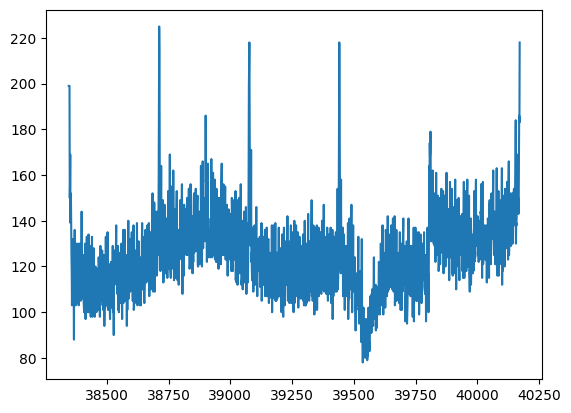

In [18]:
df_features[(df_features.country_Canada==1)&
            (df_features['store_Kaggle Learn']==1)&
            (df_features['product_Using LLMs to Train More LLMs']==1)].lag_3.plot()

In [19]:
# Finding optimal Hyperparameters
model = optimize_lgbm(X_train, y_train, date_col='date', n_trials=25)

[I 2024-07-07 13:28:54,395] A new study created in memory with name: no-name-1132a98f-c592-4db1-b70e-f481a3436a85
[I 2024-07-07 13:28:56,334] Trial 0 finished with value: 5.854282602132343 and parameters: {'n_estimators': 250, 'learning_rate': 0.28767857660247903, 'max_depth': 8}. Best is trial 0 with value: 5.854282602132343.
[I 2024-07-07 13:28:58,494] Trial 1 finished with value: 5.968487828522523 and parameters: {'n_estimators': 340, 'learning_rate': 0.08900466011060913, 'max_depth': 4}. Best is trial 0 with value: 5.854282602132343.
[I 2024-07-07 13:28:59,623] Trial 2 finished with value: 6.020548903747553 and parameters: {'n_estimators': 123, 'learning_rate': 0.2665440364437338, 'max_depth': 7}. Best is trial 0 with value: 5.854282602132343.
[I 2024-07-07 13:29:02,791] Trial 3 finished with value: 5.735166484318161 and parameters: {'n_estimators': 383, 'learning_rate': 0.055146123573950614, 'max_depth': 10}. Best is trial 3 with value: 5.735166484318161.
[I 2024-07-07 13:29:05,60

In [20]:
# # Fit the model
# model.fit(X_train.drop('date', axis=1), y_train)

In [21]:
# Iteratively making Predictions for each selected period
df_forecast = iterative_forecasting(model, X_train.drop('date', axis=1), y_train, X_val.drop('date', axis=1), val_mask, df_features)
df_forecast[['date', 'num_sold', 'forecast']].head(3)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002564 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1870
[LightGBM] [Info] Number of data points in the train set: 130650, number of used features: 23
[LightGBM] [Info] Start training from score 164.432591


,date,num_sold,forecast
1742,2021-10-09,184,197.796256
1743,2021-10-10,203,216.884533
1744,2021-10-11,163,177.384464


In [22]:
df_forecast[['date', 'num_sold', 'forecast']]

,date,num_sold,forecast
1742,2021-10-09,184,197.796256
1743,2021-10-10,203,216.884533
1744,2021-10-11,163,177.384464
1745,2021-10-12,187,177.908748
1746,2021-10-13,185,173.433029
...,...,...,...
136945,2021-12-27,111,553.547065
136946,2021-12-28,131,593.013396
136947,2021-12-29,149,609.762518
136948,2021-12-30,146,618.888865


In [23]:
# Calculate Mertics values
true_values = df_forecast['num_sold'].values
forecasted_values = np.maximum(df_forecast['forecast'].values, 0)

# SMAPE
smape_value = smape(true_values, forecasted_values)
print(f"SMAPE: {smape_value:.2f}%")

# RMSLE
rmsle_value = rmsle(true_values, forecasted_values)
print(f"RMSLE: {rmsle_value:.4f}")

SMAPE: 124.44%
RMSLE: 2.1477


 **Model Performance and Potential Improvements**

We trained a `LGBMRegressor` model on the data, using cross-validation to tune the hyperparameters. As we can see, the metric values are quite good.

> **These metrics can still be improved. Examples of improvements include:**
> - Modeling each country separately
> - Creating new features
> - Experimenting with different algorithms


## 🔍 Feature Selection and Optimization

Here, we can **select the necessary features** and then **apply the `optimize_lgbm` function again** on the chosen dataset.

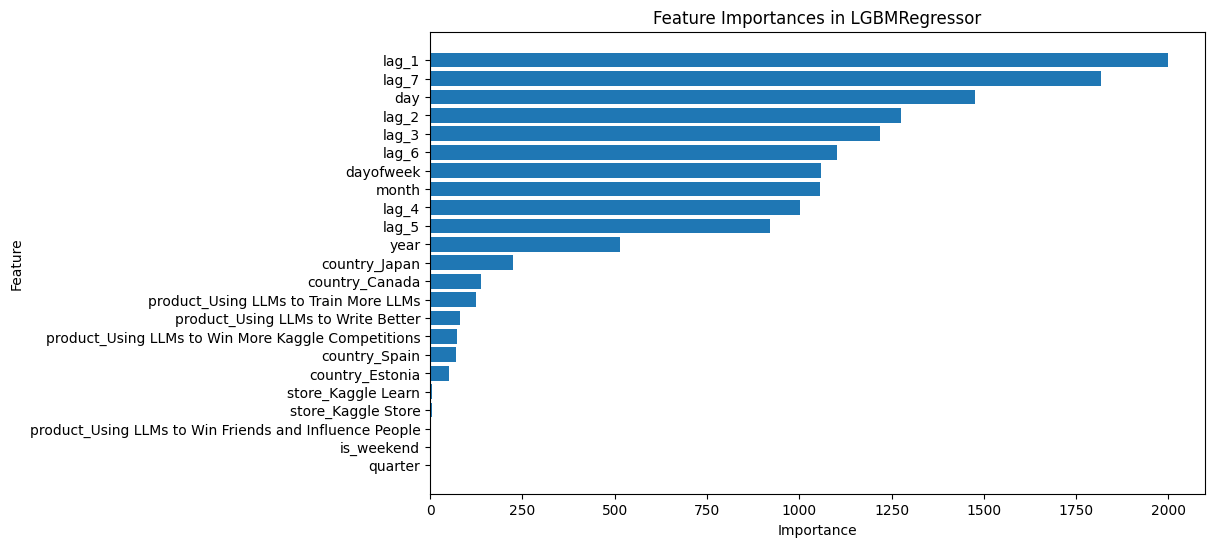

In [25]:
importances = model.feature_importances_
feature_names = X_train.drop('date', axis=1).columns

# Визуализация важности признаков
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in LGBMRegressor')
plt.gca().invert_yaxis()
plt.show()

## 📊 Results Visualization

Mean Delta: -468.1390538784915



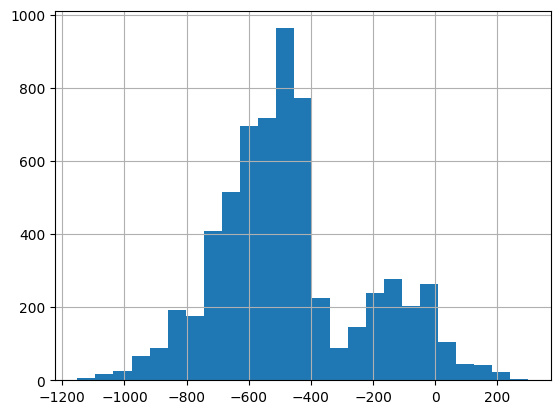

In [26]:
df_forecast['delta'] = df_forecast['num_sold'] - df_forecast['forecast']
print('Mean Delta:', df_forecast['delta'].mean())
print()
df_forecast['delta'].hist(bins=25)
plt.show()

In [27]:
print(countries)
print(products)
print(stores)

['Argentina' 'Canada' 'Estonia' 'Japan' 'Spain']
['Using LLMs to Improve Your Coding' 'Using LLMs to Train More LLMs'
 'Using LLMs to Win Friends and Influence People'
 'Using LLMs to Win More Kaggle Competitions' 'Using LLMs to Write Better']
['Kaggle Learn' 'Kaggle Store' 'Kagglazon']


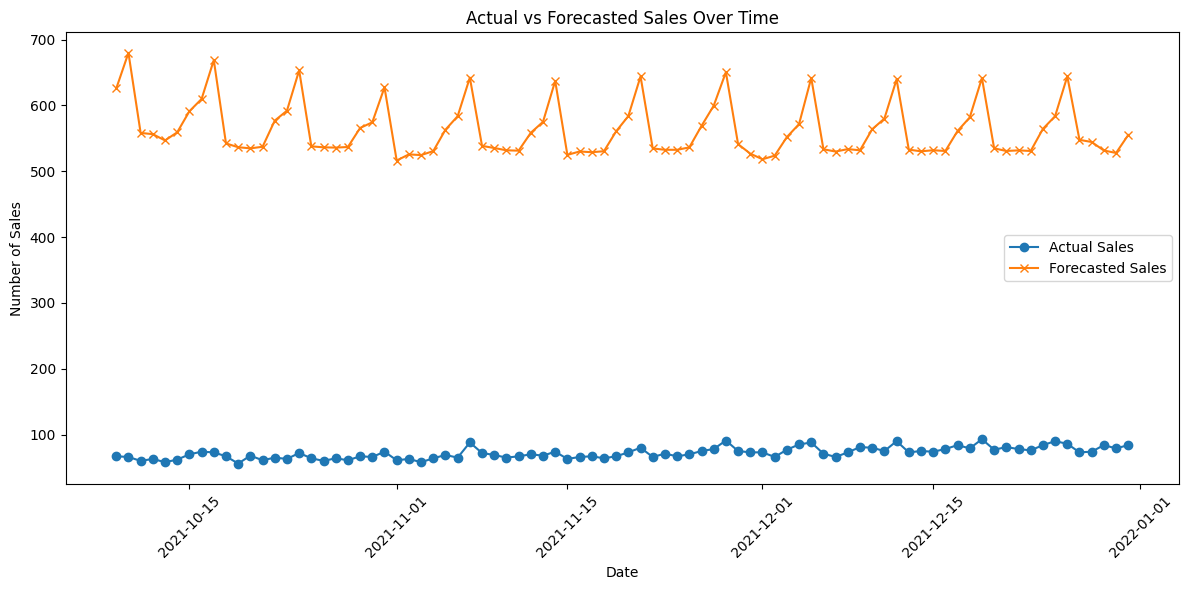

In [32]:
cntr = 'Japan'
prdct = 'Using LLMs to Write Better'
str_ = 'Kaggle Learn'

df_smpl = df_forecast[df_forecast['country_'+cntr] == 1]
df_smpl = df_smpl[df_smpl['product_'+prdct] == 1]
df_smpl = df_smpl[df_smpl['store_'+str_] == 1]

plt.figure(figsize=(12, 6))

plt.plot(df_smpl['date'], df_smpl['num_sold'], label='Actual Sales', marker='o')

plt.plot(df_smpl['date'], df_smpl['forecast'], label='Forecasted Sales', marker='x')

plt.title('Actual vs Forecasted Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Sales')

plt.legend()

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()